/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


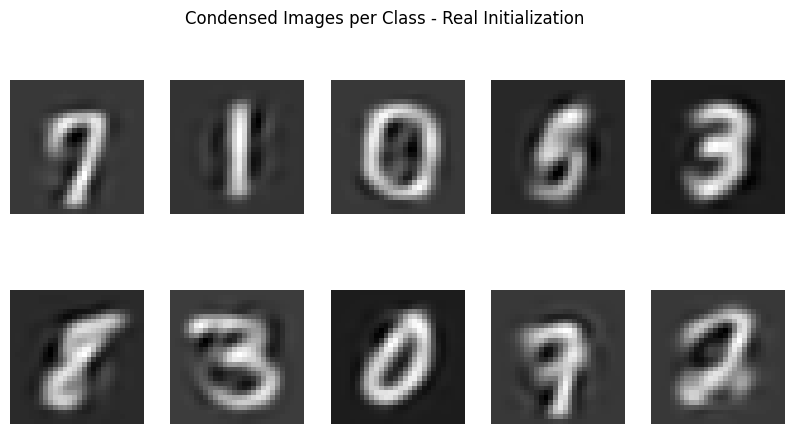

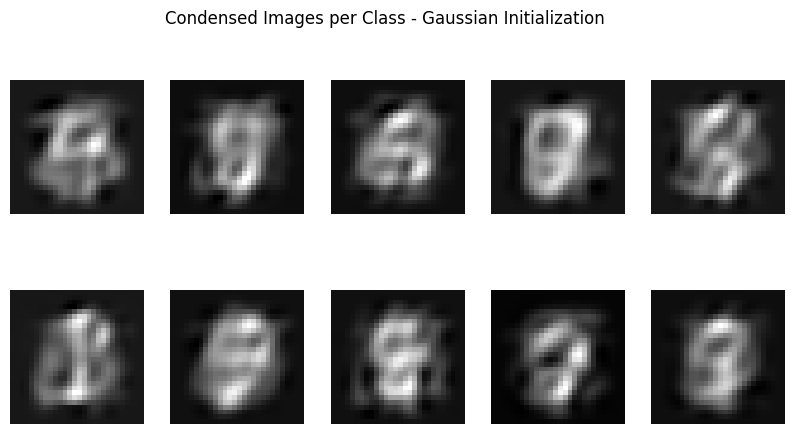

In [ ]:
# # Import necessary libraries
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import fetch_openml
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # Load MNIST dataset
# mnist = fetch_openml('mnist_784')
# X, y = mnist.data.astype('float32'), mnist.target.astype('int64')

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the data
# scaler = StandardScaler()
# X_train_std = scaler.fit_transform(X_train)

# # Apply PCA for dimensionality reduction
# pca = PCA(n_components=50)
# X_train_pca = pca.fit_transform(X_train_std)

# # Initialize synthetic dataset S with condensed images
# # Method 1: Randomly select from real training images
# condensed_images_real_init = X_train_pca[np.random.choice(X_train_pca.shape[0], size=10, replace=False)]

# # Method 2: Initialize with Gaussian noise
# condensed_images_gaussian_init = np.random.normal(0, 1, size=(10, 50))  # Adjust dimensions as needed

# # Visualize condensed images per class
# # Visualize condensed images per class
# def visualize_condensed_images(condensed_images, method):
#     fig, axs = plt.subplots(2, 5, figsize=(10, 5))
#     for i in range(2):
#         for j in range(5):
#             img = scaler.inverse_transform(pca.inverse_transform(condensed_images[i * 5 + j].reshape(1, -1)))
#             axs[i, j].imshow(img.reshape(28, 28), cmap='gray')
#             axs[i, j].axis('off')
#     fig.suptitle(f'Condensed Images per Class - {method} Initialization')
#     plt.show()

# # Visualize condensed images with real initialization
# visualize_condensed_images(condensed_images_real_init, method='Real')

# # Visualize condensed images with Gaussian noise initialization
# visualize_condensed_images(condensed_images_gaussian_init, method='Gaussian')



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


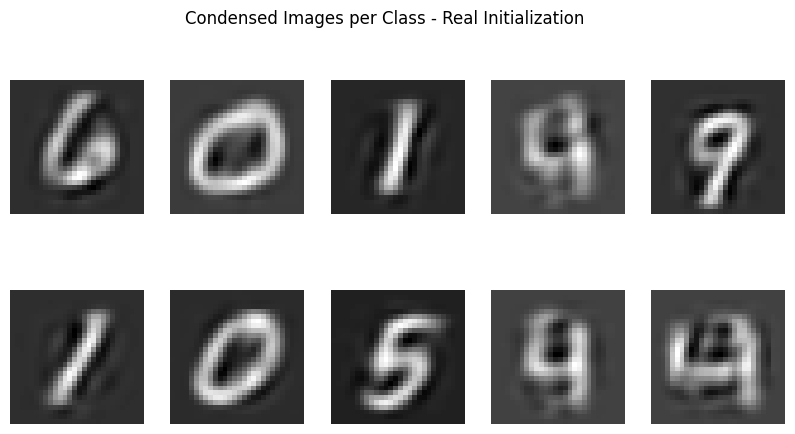

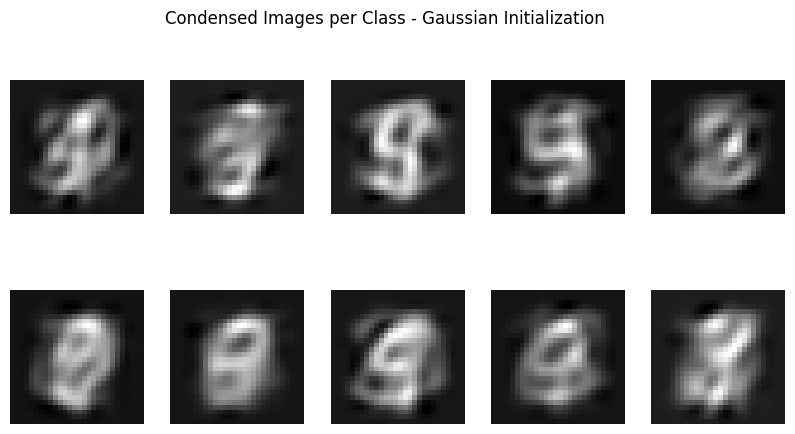

Epoch 1/10
1/1 - 1s - loss: 3.8501 - accuracy: 0.0875 - val_loss: 3.2246 - val_accuracy: 0.0500 - 714ms/epoch - 714ms/step
Epoch 2/10
1/1 - 0s - loss: 3.5944 - accuracy: 0.0875 - val_loss: 3.1797 - val_accuracy: 0.0500 - 38ms/epoch - 38ms/step
Epoch 3/10
1/1 - 0s - loss: 3.3505 - accuracy: 0.1000 - val_loss: 3.1404 - val_accuracy: 0.0500 - 57ms/epoch - 57ms/step
Epoch 4/10
1/1 - 0s - loss: 3.1270 - accuracy: 0.1125 - val_loss: 3.1057 - val_accuracy: 0.1000 - 33ms/epoch - 33ms/step
Epoch 5/10
1/1 - 0s - loss: 2.9270 - accuracy: 0.1375 - val_loss: 3.0759 - val_accuracy: 0.1000 - 40ms/epoch - 40ms/step
Epoch 6/10
1/1 - 0s - loss: 2.7485 - accuracy: 0.1625 - val_loss: 3.0507 - val_accuracy: 0.1000 - 40ms/epoch - 40ms/step
Epoch 7/10
1/1 - 0s - loss: 2.5920 - accuracy: 0.2125 - val_loss: 3.0294 - val_accuracy: 0.1000 - 41ms/epoch - 41ms/step
Epoch 8/10
1/1 - 0s - loss: 2.4489 - accuracy: 0.2250 - val_loss: 3.0113 - val_accuracy: 0.1000 - 37ms/epoch - 37ms/step
Epoch 9/10
1/1 - 0s - loss: 2.

TypeError: ignored

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data.astype('float32'), mnist.target.astype('int64')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)

# Set parameters
K = 100
T = 10
ηS = 0.1
ζS = 1
ηθ = 0.01
ζθ = 50
optimizer = optimizers.SGD(learning_rate=0.01)  # Specify the optimizer
minibatch_size = 256

# Initialize synthetic dataset S with condensed images
# Method 1: Randomly select from real training images
condensed_images_real_init = X_train_pca[np.random.choice(X_train_pca.shape[0], size=K, replace=False)]

# Method 2: Initialize with Gaussian noise
condensed_images_gaussian_init = np.random.normal(0, 1, size=(K, 50))  # Adjust dimensions as needed

# Visualize condensed images per class
def visualize_condensed_images(condensed_images, method):
    fig, axs = plt.subplots(2, 5, figsize=(10, 5))
    for i in range(2):
        for j in range(5):
            img = scaler.inverse_transform(pca.inverse_transform(condensed_images[i * 5 + j].reshape(1, -1)))
            axs[i, j].imshow(img.reshape(28, 28), cmap='gray')
            axs[i, j].axis('off')
    fig.suptitle(f'Condensed Images per Class - {method} Initialization')
    plt.show()

# Visualize condensed images with real initialization
visualize_condensed_images(condensed_images_real_init, method='Real')

# Visualize condensed images with Gaussian noise initialization
visualize_condensed_images(condensed_images_gaussian_init, method='Gaussian')

# Define a simple classifier model
def create_classifier_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, epochs=10):
    model.fit(X_train, y_train, epochs=epochs, batch_size=minibatch_size, validation_split=0.2, verbose=2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Train and evaluate the classifier with real initialization
classifier_real_init = create_classifier_model((50,), 10)
train_and_evaluate_model(classifier_real_init, condensed_images_real_init, np.random.randint(0, 10, K), X_test, y_test)

# Train and evaluate the classifier with Gaussian noise initialization
classifier_gaussian_init = create_classifier_model((50,), 10)
train_and_evaluate_model(classifier_gaussian_init, condensed_images_gaussian_init, np.random.randint(0, 10, K), X_test, y_test)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data.astype('float32'), mnist.target.astype('int64')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)

# Set parameters
K = 100
T = 10
ηS = 0.1
ζS = 1
ηθ = 0.01
ζθ = 50
optimizer = optimizers.SGD(learning_rate=0.01)  # Specify the optimizer
minibatch_size = 256

# Initialize synthetic dataset S with condensed images
# Method 1: Randomly select from real training images
condensed_images_real_init = X_train_pca[np.random.choice(X_train_pca.shape[0], size=K, replace=False)]

# Method 2: Initialize with Gaussian noise
condensed_images_gaussian_init = np.random.normal(0, 1, size=(K, 50))  # Adjust dimensions as needed

# Define a simple classifier model
def create_classifier_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, epochs=10):
    model.fit(X_train, y_train, epochs=epochs, batch_size=minibatch_size, validation_split=0.2, verbose=2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
    return test_accuracy

# Train and evaluate the classifier with real initialization
classifier_real_init = create_classifier_model((50,), 10)
real_init_accuracy = train_and_evaluate_model(classifier_real_init, condensed_images_real_init, np.random.randint(0, 10, K), X_test, y_test)

# Train and evaluate the classifier with Gaussian noise initialization
classifier_gaussian_init = create_classifier_model((50,), 10)
gaussian_init_accuracy = train_and_evaluate_model(classifier_gaussian_init, condensed_images_gaussian_init, np.random.randint(0, 10, K), X_test, y_test)

print(f'Real Initialization Test Accuracy: {real_init_accuracy * 100:.2f}%')
print(f'Gaussian Initialization Test Accuracy: {gaussian_init_accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/10
1/1 - 1s - loss: 3.5044 - accuracy: 0.1000 - val_loss: 2.7896 - val_accuracy: 0.1000 - 846ms/epoch - 846ms/step
Epoch 2/10
1/1 - 0s - loss: 3.2828 - accuracy: 0.1000 - val_loss: 2.7470 - val_accuracy: 0.1000 - 32ms/epoch - 32ms/step
Epoch 3/10
1/1 - 0s - loss: 3.0900 - accuracy: 0.1125 - val_loss: 2.7099 - val_accuracy: 0.1500 - 37ms/epoch - 37ms/step
Epoch 4/10
1/1 - 0s - loss: 2.9123 - accuracy: 0.1500 - val_loss: 2.6774 - val_accuracy: 0.1000 - 36ms/epoch - 36ms/step
Epoch 5/10
1/1 - 0s - loss: 2.7420 - accuracy: 0.1750 - val_loss: 2.6496 - val_accuracy: 0.1000 - 33ms/epoch - 33ms/step
Epoch 6/10
1/1 - 0s - loss: 2.5798 - accuracy: 0.2000 - val_loss: 2.6266 - val_accuracy: 0.1000 - 32ms/epoch - 32ms/step
Epoch 7/10
1/1 - 0s - loss: 2.4267 - accuracy: 0.2125 - val_loss: 2.6080 - val_accuracy: 0.1000 - 33ms/epoch - 33ms/step
Epoch 8/10
1/1 - 0s - loss: 2.2828 - accuracy: 0.2375 - val_loss: 2.5932 - val_accuracy: 0.1000 - 51ms/epoch - 51ms/step
Epoch 9/10
1/1 - 0s - loss: 2.

TypeError: ignored